In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import skew
import warnings

In [2]:
# Para ignorar todos los warnings
warnings.filterwarnings("ignore")

# Base Radiómica:

In [3]:
PATH1 = 'C:\\Users\\raque\\OneDrive\\Documents\\TFG\\Datos\\radiomicas_filtradas.xlsx'
rad = pd.read_excel(PATH1)
rad.head()

,segmentation_series_uid,series_uid,study_uid,patient_id,shape_Elongation_Original={},shape_Flatness_Original={},shape_LeastAxisLength_Original={},shape_MajorAxisLength_Original={},shape_Maximum2DDiameterColumn_Original={},shape_Maximum2DDiameterRow_Original={},...,glszm_SmallAreaHighGrayLevelEmphasis_Original={},glszm_SmallAreaLowGrayLevelEmphasis_Original={},glszm_ZoneEntropy_Original={},glszm_ZonePercentage_Original={},glszm_ZoneVariance_Original={},ngtdm_Busyness_Original={},ngtdm_Coarseness_Original={},ngtdm_Complexity_Original={},ngtdm_Contrast_Original={},ngtdm_Strength_Original={}
0,1.3.6.1.4.1.58108.2.4848504848484869.202205051...,1.3.6.1.4.1.58108.1.27521747984279687110283758...,1.3.6.1.4.1.58108.1.28900688553367036462520279...,PCa-309375596266186162193666122036307054522,0.570833,0.063041,2.500666,39.667346,36.055513,42.059482,...,4982.538771,0.001584,7.201058,0.726514,0.765383,0.015081,0.006567,42252.702004,0.430100,36.983853
1,1.3.6.1.4.1.58108.2.4848504848484869.202211230...,1.3.6.1.4.1.58108.1.28201143562834474044014297...,1.3.6.1.4.1.58108.1.29363825800908401771813195...,PCa-150134915909813565458183021251815591830,0.782129,0.000000,0.000000,30.499445,32.000000,32.249031,...,2255.168099,0.008864,6.959117,0.816406,0.270003,0.008049,0.040747,14789.188885,0.610427,171.091157
2,1.3.6.1.4.1.58108.2.4848504848484869.202211300...,1.3.6.1.4.1.58108.1.12865261731798101700885982...,1.3.6.1.4.1.58108.1.33101214572886667956939286...,PCa-160407109316953872859568180577152278243,0.701985,0.066268,1.999392,30.171134,29.017236,30.364453,...,1125.992037,0.001840,6.799350,0.655602,1.274676,0.078077,0.005593,25105.364362,0.674630,16.698969
3,1.3.6.1.4.1.58108.2.4848504848484869.202211300...,1.3.6.1.4.1.58108.1.19428963212308998538015917...,1.3.6.1.4.1.58108.1.47598134885468549618956454...,PCa-292730720557498230634178435036499760377,0.809698,0.045721,1.428056,31.234257,32.015621,32.756679,...,1694.211366,0.002938,6.539199,0.769137,0.484945,0.028313,0.010561,13868.558835,0.346667,25.109662
4,1.3.6.1.4.1.58108.2.4848504848484869.202301261...,1.3.6.1.4.1.58108.1.20693354072432651235608301...,1.3.6.1.4.1.58108.1.29949027346289296956133429...,PCa-64468662083827303471384243271335703007,0.554691,0.099923,11.908565,119.176949,127.098387,133.015037,...,449.041909,0.001740,7.522328,0.093238,23790.692192,1.678014,0.000316,3207.476912,0.013894,1.949754


In [4]:
rad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Columns: 111 entries, segmentation_series_uid to ngtdm_Strength_Original={}
dtypes: float64(106), int64(1), object(4)
memory usage: 280.2+ KB


In [5]:
# Verifica si hay duplicados en la columna "patient id"
duplicados = rad.duplicated(subset=['patient_id'])

# Imprime las filas duplicadas (si las hay)
if duplicados.any():
    filas_duplicadas = rad.loc[duplicados, 'patient_id']
    print("Filas duplicadas en la columna 'patient_id':")
    print(filas_duplicadas)
else:
    print("No hay filas duplicadas en la columna 'patient_id'.")


No hay filas duplicadas en la columna 'patient_id'.


# Base Clínica:

In [6]:
PATH2 = 'C:\\Users\\raque\\OneDrive\\Documents\\TFG\\Datos\\clinicas_filtradas.xlsx'
cli = pd.read_excel(PATH2)
cli.head()

,patient_id,age,psas_0_total,lesions_0_pi_rads,lesions_0_gleason1.1,lesions_0_gleason2.1,ISUP,TZ,PZ,CZ,AS
0,PCa-75475649828150579970034301886067519673,65,3.3,5,3,4,2,True,False,False,False
1,PCa-309375596266186162193666122036307054522,79,9.2,5,4,4,4,True,True,False,False
2,PCa-240645772065291136945345674051105892254,50,5.0,4,3,3,1,False,True,False,False
3,PCa-252126464640095735522533506714295792178,61,4.1,4,3,3,1,False,True,False,False
4,PCa-212388927302074918048516729360722375565,60,5.8,4,3,3,1,False,True,False,False


In [7]:
cli.shape

(323, 11)

In [8]:
cli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   patient_id            323 non-null    object 
 1   age                   323 non-null    int64  
 2   psas_0_total          323 non-null    float64
 3   lesions_0_pi_rads     323 non-null    int64  
 4   lesions_0_gleason1.1  323 non-null    int64  
 5   lesions_0_gleason2.1  323 non-null    int64  
 6   ISUP                  323 non-null    int64  
 7   TZ                    323 non-null    bool   
 8   PZ                    323 non-null    bool   
 9   CZ                    323 non-null    bool   
 10  AS                    323 non-null    bool   
dtypes: bool(4), float64(1), int64(5), object(1)
memory usage: 19.1+ KB


Antes de estudiar cada variable por separado, obtenemos un resumen estadístico general para comprobar si necesitamos hacer alguna modificación. En este caso, las variables `lesions_0_pi_rads`, `lesions_0_gleason1.1`, `lesions_0_gleason2.1`, e `ISUP`, son categóricas ordinales y están representadas en una escala numérica del 1 al 5. Así pues, cualquier otro valor se asume como faltante.

In [9]:
cli.describe()

,age,psas_0_total,lesions_0_pi_rads,lesions_0_gleason1.1,lesions_0_gleason2.1,ISUP
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,65.139319,11.269524,4.337461,3.346749,3.665635,2.337461
std,7.895028,17.911108,0.626081,0.526220,0.625267,1.185074
min,41.000000,0.730000,2.000000,3.000000,3.000000,1.000000
25%,60.000000,4.965000,4.000000,3.000000,3.000000,2.000000
50%,66.000000,7.400000,4.000000,3.000000,4.000000,2.000000
75%,71.000000,11.269524,5.000000,4.000000,4.000000,3.000000
max,84.000000,226.000000,5.000000,5.000000,5.000000,5.000000


Vamos a identificar esos valores faltantes para evitar confusiones.

In [10]:
col = ['lesions_0_pi_rads', 'lesions_0_gleason1.1', 'lesions_0_gleason2.1', 'ISUP']

for c in col:
    valores_fuera_de_rango = cli[(cli[c] < 1) | (cli[c] > 5)]
    if not valores_fuera_de_rango.empty:
        print(f"Hay valores fuera del rango en la columna {c}:\n{valores_fuera_de_rango}")
    else:
        print(f"No hay valores fuera del rango en la columna {c}")

No hay valores fuera del rango en la columna lesions_0_pi_rads
No hay valores fuera del rango en la columna lesions_0_gleason1.1
No hay valores fuera del rango en la columna lesions_0_gleason2.1
No hay valores fuera del rango en la columna ISUP


Dado que todos los valores están entre 1 y 5, no hay que hacer ninguna modificación. 

In [11]:
# Guardar el DataFrame reducido de variables radiómicas en un nuevo archivo
path_clinicas_faltantes = 'C:\\Users\\raque\\OneDrive\\Documents\\TFG\\Datos\\clinicas_faltantes.xlsx'
cli.to_excel(path_clinicas_faltantes, index=False)

### Edad (`age`):

En primer lugar, estudiamos brevemente la edad. Si nos fijamos en el gráfico y las estadísticas descriptivas, podemos apreciar que la distribución de las edades tiene una tendencia central alrededor de la media y la mediana, con una ligera asimetría negativa, lo que significa que hay una tendencia hacia las edades más jóvenes. Además, aunque el promedio de edades en el estudio es 65 años, la desviación estándar sugiere que las edades tienden a desviarse, en promedio, alrededor de 7.88 años de la media. Esto indica una cierta variabilidad en las edades de los pacientes en nuestro estudio. Los cuartiles también destacan esta variabilidad.

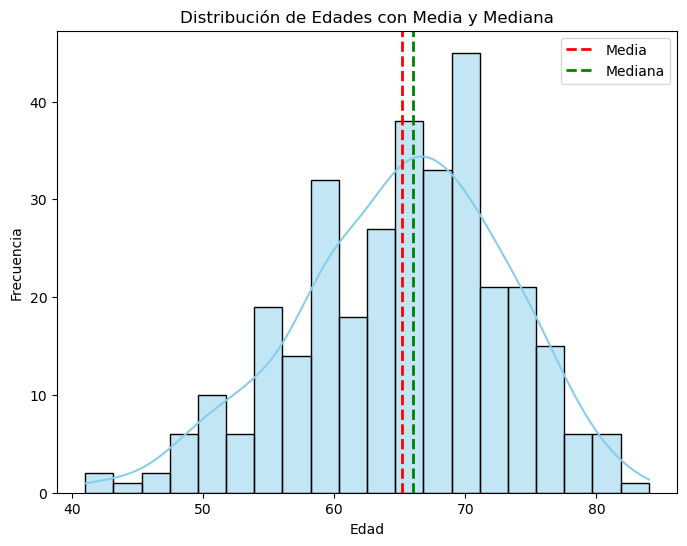

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(cli['age'], bins=20, kde=True, color='skyblue')
plt.axvline(cli['age'].mean(), color='red', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(cli['age'].median(), color='green', linestyle='dashed', linewidth=2, label='Mediana')
plt.title('Distribución de Edades con Media y Mediana')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [13]:
edad = cli['age']

media = np.mean(edad)
mediana = np.median(edad)
asimetria = skew(edad)
moda = stats.mode(edad)
desviacion_tipica = np.std(edad)
varianza = np.var(edad)
cuartiles = np.percentile(edad, [25, 50, 75])

print(f'Media: {media:.2f}')
print(f'Mediana: {mediana}')
print(f'Coeficiente de Asimetría: {asimetria:.2f}')
print(f'Moda: {moda.mode[0]} (con frecuencia {moda.count[0]} veces)')
print(f'Desviación Típica: {desviacion_tipica:.2f}')
print(f'Varianza: {varianza:.2f}')
print(f'Cuartiles (25%, 50%, 75%): {cuartiles}')

Media: 65.14
Mediana: 66.0
Coeficiente de Asimetría: -0.37
Moda: 65 (con frecuencia 24 veces)
Desviación Típica: 7.88
Varianza: 62.14
Cuartiles (25%, 50%, 75%): [60. 66. 71.]


### PSA (`psas_0_total`):

Esta variable mide el nivel de PSA en sangre, un PSA alto puede indicar problemas en la próstata. Para ello, usamos un gráfico de caja y bigotes. En un primer intento, vemos que tiene muchos valores atípicos, lo que dificulta la visualización. Así pues, vamos a usar un percentil 95 para truncar estos valores atípicos y poder hacer una interpretación más sencilla.  
En primer lugar, nos fijamos en la mediana, que está alrededor de 7. Dado que está un poco posicionada hacia la izquierda, podemos decir que la distribución es asimétrica positiva. La longitud de la caja informa sobre la dispersión intercuartílica, que va desde 5 hasta 12, esto quiere decir que el 50% de los pacientes tienen un nivel de PSA entre esos valores.En cuanto a los valores mínimo y máximo, vemos que estos están alrededor de 0 y 21. Esto quiere decir que el bigote derecho se extiende hasta 21, lo que implica una mayor dispersión. Finalmente, apreciamos bastantes valores a partir del 21, estos son considerados atípicos, pues son considerablemente mayores que la mayoría de los datos. 

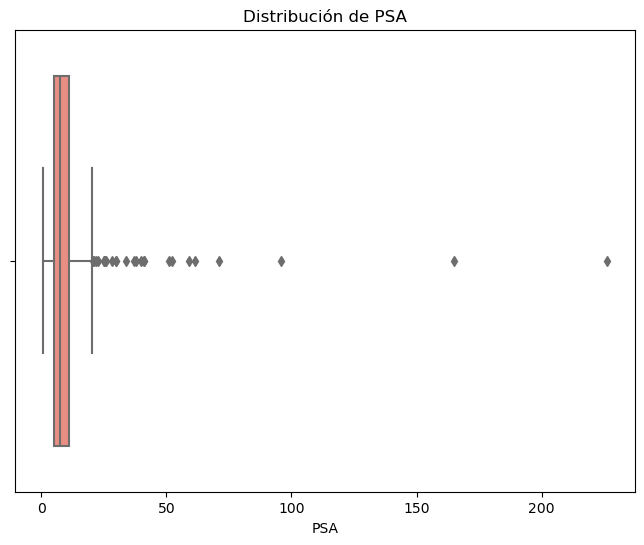

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=cli['psas_0_total'], color='salmon')
plt.title('Distribución de PSA')
plt.xlabel('PSA')
plt.show()

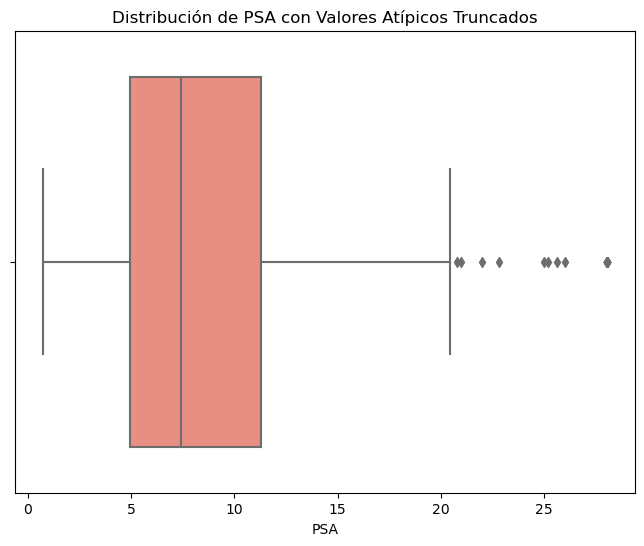

In [15]:
psa_truncado = cli['psas_0_total'].clip(upper=cli['psas_0_total'].quantile(0.95))

plt.figure(figsize=(8, 6))
sns.boxplot(x=psa_truncado, color='salmon')
plt.title('Distribución de PSA con Valores Atípicos Truncados')
plt.xlabel('PSA')
plt.show()

In [16]:
cli['psas_0_total'].describe()

count    323.000000
mean      11.269524
std       17.911108
min        0.730000
25%        4.965000
50%        7.400000
75%       11.269524
max      226.000000
Name: psas_0_total, dtype: float64

### Lesiones (`lesions_0_pi_rads`):

Esta variable es un sitema de puntuación que evalua la probabilidad de que una lesión en la próstata sea cancerosa. Así pues, se ha querido mostrar la frecuencia de cada una de las categorías. De esta forma, podemos apreciar que la mayoría de pacientes tienen una alta probabilidad de que la lesión sea cancerosa, pues la mayoría de valores comprenden entre 4-5.

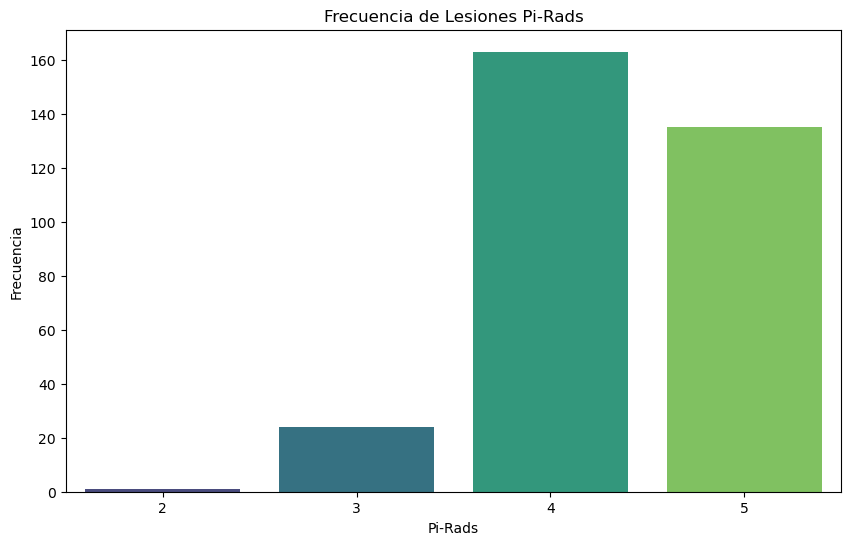

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x=cli['lesions_0_pi_rads'], palette='viridis')
plt.title('Frecuencia de Lesiones Pi-Rads')
plt.xlabel('Pi-Rads')
plt.ylabel('Frecuencia')
plt.show()

### Gleason Scores (`lesions_0_gleason1.1`, `lesions_0_gleason2.1`):
   - Explora la distribución de los Gleason Scores.
   - Puedes utilizar un gráfico de barras o un diagrama de violín para comparar ambos Gleason Scores.
   
El Gleason score es una puntuación que se asigna después de examinar las muestras de tejido de la próstata en una biopsia. Evalua la agresividad del cáncer y consiste en dos valores. Estas puntuaciones reflejan el grado de anormalidad del tejido observado en la biopsia. Al representar las frecuencias de cada uno de los valores, nos damos cuenta que la gran mayoría de los pacientes presentan tejidos anormales.  

   lesions_0_gleason1.1  lesions_0_gleason2.1
3                   219                   135
4                    96                   161
5                     8                    27


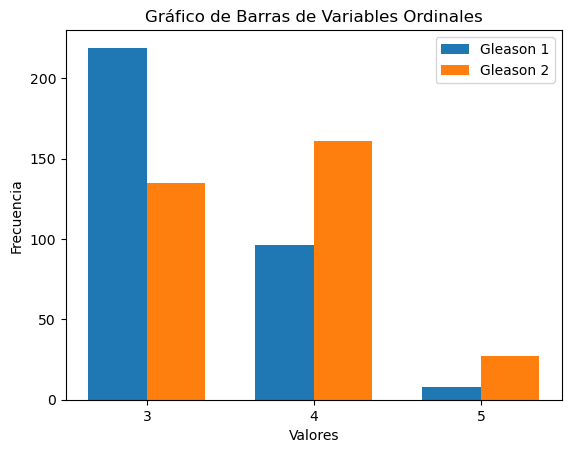

In [18]:
# Contar la frecuencia de cada valor en ambas variables
count_var1 = cli['lesions_0_gleason1.1'].value_counts().sort_index()
count_var2 = cli['lesions_0_gleason2.1'].value_counts().sort_index()
print(pd.DataFrame({'lesions_0_gleason1.1': count_var1, 'lesions_0_gleason2.1': count_var2}))

# Crear un gráfico de barras
fig, ax = plt.subplots()

# Ancho de las barras
bar_width = 0.35

# Posición de las barras en el eje x
r1 = range(len(count_var1))
r2 = [x + bar_width for x in r1]

# Plotear las barras
ax.bar(r1, count_var1, width=bar_width, label='Gleason 1')
ax.bar(r2, count_var2, width=bar_width, label='Gleason 2')

# Configuración del gráfico
ax.set_xlabel('Valores')
ax.set_ylabel('Frecuencia')
ax.set_title('Gráfico de Barras de Variables Ordinales')
ax.set_xticks([x + bar_width / 2 for x in r1])
ax.set_xticklabels(count_var1.index)
ax.legend()

# Mostrar el gráfico
plt.show()

### `ISUP`:

Esta variable clasifica el grado de severidad del cáncer. Tal y como podemos ver en el gráfico, la mayor frecuencia se presenta en el 1 y 2, con lo que la mayoría de pacientes no tienen un cáncer muy severo.

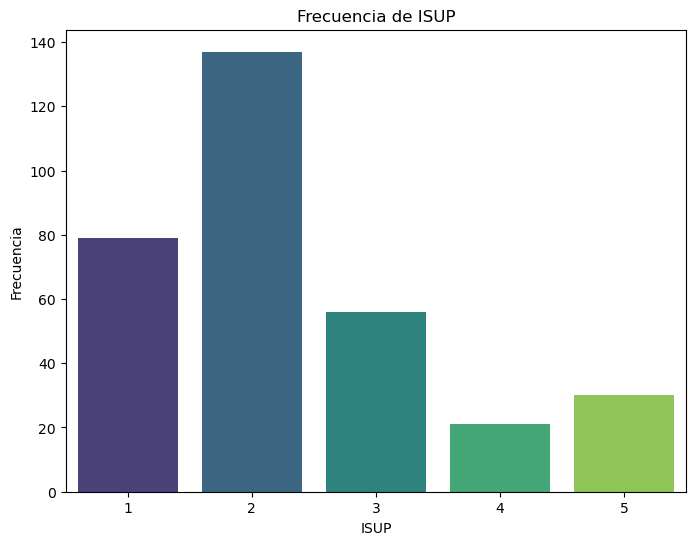

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ISUP', data=cli, palette='viridis')
plt.title('Frecuencia de ISUP')
plt.xlabel('ISUP')
plt.ylabel('Frecuencia')
plt.show()

### `TZ`, `PZ`, `CZ`, `AS`:

Estas cuatro variables indican si hay infiltración en diferentes zonas de la próstata, concretamente en la zona de transición, en la zona periférica, la central y la anterior. El gráfico muestra que la zona más afectada es la periférica.

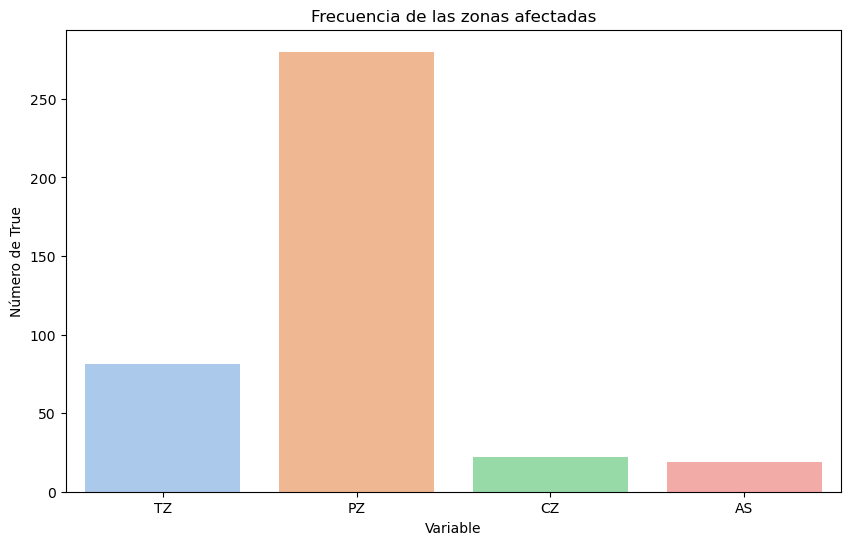

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para el número de valores True en las variables booleanas
variables_booleanas = ['TZ', 'PZ', 'CZ', 'AS']
frecuencia_true = [cli[variable].sum() for variable in variables_booleanas]

plt.figure(figsize=(10, 6))
sns.barplot(x=variables_booleanas, y=frecuencia_true, palette='pastel')
plt.title('Frecuencia de las zonas afectadas')
plt.xlabel('Variable')
plt.ylabel('Número de True')
plt.show()

### Correlaciones:

Como era de esperar, las variable `ISUP` está muy correlacionada con las variables `lesions_0_gleason1.1` y `lesions_0_gleason2.1`.  
También podemos apreciar una correlación negativa entre las zonas de infiltración `TZ`y `PZ`.

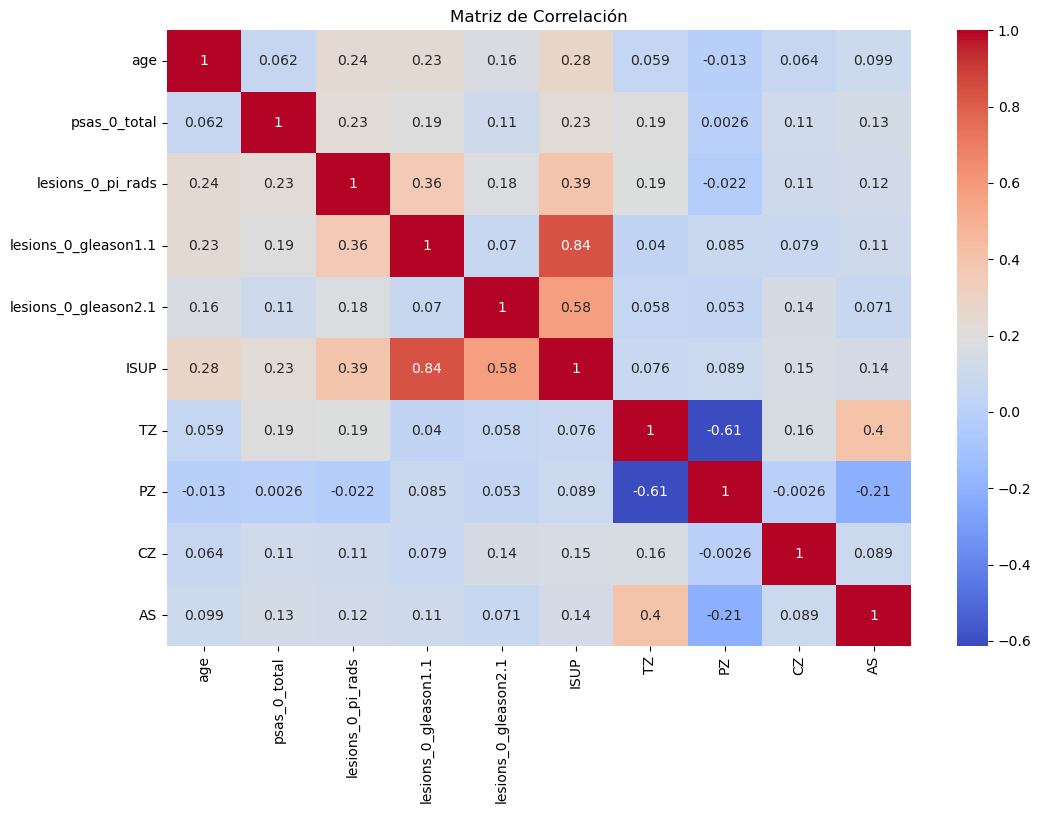

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(cli.corr(), cmap='coolwarm', annot=True)
plt.title('Matriz de Correlación')
plt.show()